In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_grupos_etarios = pd.read_csv('Estad_sticas_Restituci_n_Discriminadas_GrupoEtario_20240201.csv')
df_discapacidad = pd.read_csv('Estad_sticas_Restituci_n_Discriminadas__Dispacidad_20240201.csv')
df_genero = pd.read_csv('Estad_sticas_Solicitudes_Seg_n_G_nero_20240201.csv')

In [ ]:
df_grupos_etarios.head()

,DepartamentoDelPredio,MunicipioDelPredio,CodigoDANE,GrupoEtarioDelSolicitante,NumeroDeSolicitantes
0,Meta,Mapiripán,50325,Mayor Mayor Entre 80-89 Años,114
1,Nariño,Roberto Payán,52621,Nonagenario,1
2,Córdoba,Planeta Rica,23555,Mayor Adulto Entre 70-79 Años,9
3,Antioquia,Valparaíso,5856,Adulto,3
4,Chocó,Cértegui,27160,Nonagenario,2


In [ ]:
df_discapacidad.head()

,DepartamentoDelPredio,MunicipioDelPredio,CodigoDANE,DiscapacidadDelSolicitante,NumeroDeTitularesConAlgunaDiscapacidad
0,Santander,Cerrito,68162,No,9
1,Antioquia,Turbo,5837,No,2218
2,Valle Del Cauca,Restrepo,76606,No,16
3,Arauca,Puerto Rondón,81591,Si,4
4,Antioquia,Puerto Nare,5585,Si,6


In [ ]:
df_genero.head()

,DepartamentoDePredio,MunicipioDelPredio,CodigoDANE,GrupoEtarioSelSolicitante,NumeroDeSolicitantes
0,Antioquia,Zaragoza,5895,Mujer,117
1,Putumayo,Orito,86320,Hombre,577
2,Antioquia,El Bagre,5250,Mujer,442
3,Putumayo,Orito,86320,NoReporta,1
4,Amazonas,La Pedrera,91407,Mujer,0


In [ ]:
df_grupos_etarios = df_grupos_etarios.sort_values(by=["DepartamentoDelPredio", "MunicipioDelPredio"], ascending=True)
df_discapacidad = df_discapacidad.sort_values(by=["DepartamentoDelPredio", "MunicipioDelPredio"], ascending=True)
df_genero = df_genero.sort_values(by=["DepartamentoDePredio", "MunicipioDelPredio"], ascending=True)

In [ ]:
df_genero.head(15)

,DepartamentoDePredio,MunicipioDelPredio,CodigoDANE,GrupoEtarioSelSolicitante,NumeroDeSolicitantes
5,Amazonas,El Encanto,91263,Hombre,0
6,Amazonas,El Encanto,91263,Mujer,4
7,Amazonas,La Chorrera,91405,Hombre,1
4,Amazonas,La Pedrera,91407,Mujer,0
8,Amazonas,La Pedrera,91407,Hombre,2
9,Amazonas,La Victoria,91430,Hombre,4
10,Amazonas,La Victoria,91430,Mujer,1
11,Amazonas,Leticia,91001,Hombre,1
12,Amazonas,Leticia,91001,Mujer,8
13,Amazonas,Miriti - Paraná,91460,Hombre,1


In [ ]:
df_pivot_grupos_etarios = df_grupos_etarios.pivot_table(index=['DepartamentoDelPredio', 'MunicipioDelPredio', 'CodigoDANE'],
                          columns='GrupoEtarioDelSolicitante',
                          values='NumeroDeSolicitantes',
                          aggfunc='sum',
                          fill_value=0).reset_index()

df_pivot_discapacidad = df_discapacidad.pivot_table(index=['DepartamentoDelPredio', 'MunicipioDelPredio', 'CodigoDANE'],
                         columns='DiscapacidadDelSolicitante',
                         values='NumeroDeTitularesConAlgunaDiscapacidad',
                         aggfunc='sum',
                         fill_value=0).reset_index()
df_pivot_genero = df_genero.pivot_table(
    index=['DepartamentoDePredio', 'MunicipioDelPredio', 'CodigoDANE'],
    columns='GrupoEtarioSelSolicitante',
    values='NumeroDeSolicitantes',
    aggfunc='sum',
    fill_value=0).reset_index()

In [ ]:
df_pivot_grupos_etarios.head()

GrupoEtarioDelSolicitante,DepartamentoDelPredio,MunicipioDelPredio,CodigoDANE,Adolescencia,Adulto,Adulto Joven,Centenario,Infancia,Mayor Adulto Entre 70-79 Años,Mayor Joven Entre 60-69 Años,Mayor Mayor Entre 80-89 Años,NoReporta,Nonagenario,Primera Infancia
0,Amazonas,El Encanto,91263,0,0,0,0,0,1,3,0,0,0,0
1,Amazonas,La Chorrera,91405,0,1,0,0,0,0,0,0,0,0,0
2,Amazonas,La Pedrera,91407,0,0,0,0,0,0,2,0,0,0,0
3,Amazonas,La Victoria,91430,0,2,0,0,0,0,3,0,0,0,0
4,Amazonas,Leticia,91001,0,4,0,0,0,3,2,0,0,0,0


In [ ]:
df_pivot_discapacidad.head()

DiscapacidadDelSolicitante,DepartamentoDelPredio,MunicipioDelPredio,CodigoDANE,No,No Reporta,Si
0,Amazonas,El Encanto,91263,3,0,1
1,Amazonas,La Chorrera,91405,1,0,0
2,Amazonas,La Pedrera,91407,2,0,0
3,Amazonas,La Victoria,91430,5,0,0
4,Amazonas,Leticia,91001,9,0,0


In [ ]:
df_pivot_genero.head()

GrupoEtarioSelSolicitante,DepartamentoDePredio,MunicipioDelPredio,CodigoDANE,Hombre,Lgbti,Mujer,NoReporta,Privada
0,Amazonas,El Encanto,91263,0,0,4,0,0
1,Amazonas,La Chorrera,91405,1,0,0,0,0
2,Amazonas,La Pedrera,91407,2,0,0,0,0
3,Amazonas,La Victoria,91430,4,0,1,0,0
4,Amazonas,Leticia,91001,1,0,8,0,0


# primera parte

In [ ]:
df_pivot_genero.rename(columns={"DepartamentoDePredio": "DepartamentoDelPredio", "NoReporta": "No Reporta Genero", "Privada" : "Genero Privado"}, inplace=True)
df_pivot_discapacidad.rename(columns={"DepartamentoDePredio": "DepartamentoDelPredio", "No":"No_Discapacidad", "No Reporta" : "No Reporta Discapacidad", "Si":"Si_Discapacidad" },inplace=True)
df_pivot_grupos_etarios.rename(columns={"NoReporta": "No Reporta Grupo Etario"}, inplace=True)

In [ ]:
merged_df = pd.merge(df_pivot_discapacidad, df_pivot_genero, on=["DepartamentoDelPredio", "MunicipioDelPredio", "CodigoDANE"], how="outer")

In [ ]:
merged_df.head()

,DepartamentoDelPredio,MunicipioDelPredio,CodigoDANE,No_Discapacidad,No Reporta Discapacidad,Si_Discapacidad,Hombre,Lgbti,Mujer,No Reporta Genero,Genero Privado
0,Amazonas,El Encanto,91263,3,0,1,0,0,4,0,0
1,Amazonas,La Chorrera,91405,1,0,0,1,0,0,0,0
2,Amazonas,La Pedrera,91407,2,0,0,2,0,0,0,0
3,Amazonas,La Victoria,91430,5,0,0,4,0,1,0,0
4,Amazonas,Leticia,91001,9,0,0,1,0,8,0,0


In [ ]:
df_final1 = pd.merge(merged_df, df_pivot_grupos_etarios, on=["DepartamentoDelPredio", "MunicipioDelPredio", "CodigoDANE"], how="outer")

In [ ]:
df_final1.head(15)

,DepartamentoDelPredio,MunicipioDelPredio,CodigoDANE,No_Discapacidad,No Reporta Discapacidad,Si_Discapacidad,Hombre,Lgbti,Mujer,No Reporta Genero,...,Adulto,Adulto Joven,Centenario,Infancia,Mayor Adulto Entre 70-79 Años,Mayor Joven Entre 60-69 Años,Mayor Mayor Entre 80-89 Años,No Reporta Grupo Etario,Nonagenario,Primera Infancia
0,Amazonas,El Encanto,91263,3,0,1,0,0,4,0,...,0,0,0,0,1,3,0,0,0,0
1,Amazonas,La Chorrera,91405,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Amazonas,La Pedrera,91407,2,0,0,2,0,0,0,...,0,0,0,0,0,2,0,0,0,0
3,Amazonas,La Victoria,91430,5,0,0,4,0,1,0,...,2,0,0,0,0,3,0,0,0,0
4,Amazonas,Leticia,91001,9,0,0,1,0,8,0,...,4,0,0,0,3,2,0,0,0,0
5,Amazonas,Miriti - Paraná,91460,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,Amazonas,Puerto Alegría,91530,5,0,0,0,0,5,0,...,3,0,0,0,2,0,0,0,0,0
7,Amazonas,Puerto Arica,91536,2,0,0,0,0,2,0,...,1,0,0,0,0,1,0,0,0,0
8,Amazonas,Puerto Santander,91669,14,0,2,10,0,6,0,...,5,0,0,0,2,7,2,0,0,0
9,Amazonas,Tarapacá,91798,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
df_final1.dtypes

,0
DepartamentoDelPredio,object
MunicipioDelPredio,object
CodigoDANE,int64
No_Discapacidad,int64
No Reporta Discapacidad,int64
Si_Discapacidad,int64
Hombre,int64
Lgbti,int64
Mujer,int64
No Reporta Genero,int64


In [ ]:
df_final1.shape

(1030, 22)

In [ ]:
df_final1.isnull().sum()

,0
DepartamentoDelPredio,0
MunicipioDelPredio,0
CodigoDANE,0
No_Discapacidad,0
No Reporta Discapacidad,0
Si_Discapacidad,0
Hombre,0
Lgbti,0
Mujer,0
No Reporta Genero,0


In [ ]:
df_final1.describe()

,CodigoDANE,No_Discapacidad,No Reporta Discapacidad,Si_Discapacidad,Hombre,Lgbti,Mujer,No Reporta Genero,Genero Privado,Adolescencia,Adulto,Adulto Joven,Centenario,Infancia,Mayor Adulto Entre 70-79 Años,Mayor Joven Entre 60-69 Años,Mayor Mayor Entre 80-89 Años,No Reporta Grupo Etario,Nonagenario,Primera Infancia
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,39500.447573,113.135922,0.031068,15.006796,73.053398,0.004854,53.868932,0.342718,0.153398,0.054369,52.437864,0.899029,0.341748,0.080583,23.060194,33.674757,12.333010,1.972816,3.286408,0.033010
std,26650.116267,226.386532,0.273561,28.758114,147.227365,0.069538,107.728528,3.406964,0.783555,0.258867,110.948519,2.928613,1.264644,0.720592,46.458444,65.924008,27.163093,6.185443,8.462718,0.287203
min,5001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15832.750000,7.000000,0.000000,1.000000,4.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,27182.500000,28.000000,0.000000,4.000000,18.000000,0.000000,13.500000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,6.000000,8.500000,3.000000,0.000000,1.000000,0.000000
75%,68080.000000,109.750000,0.000000,14.750000,71.000000,0.000000,51.000000,0.000000,0.000000,0.000000,51.750000,1.000000,0.000000,0.000000,23.000000,32.000000,11.000000,2.000000,3.000000,0.000000
max,99773.000000,2305.000000,4.000000,235.000000,1677.000000,1.000000,1054.000000,99.000000,14.000000,3.000000,1230.000000,39.000000,16.000000,21.000000,532.000000,633.000000,289.000000,100.000000,114.000000,5.000000


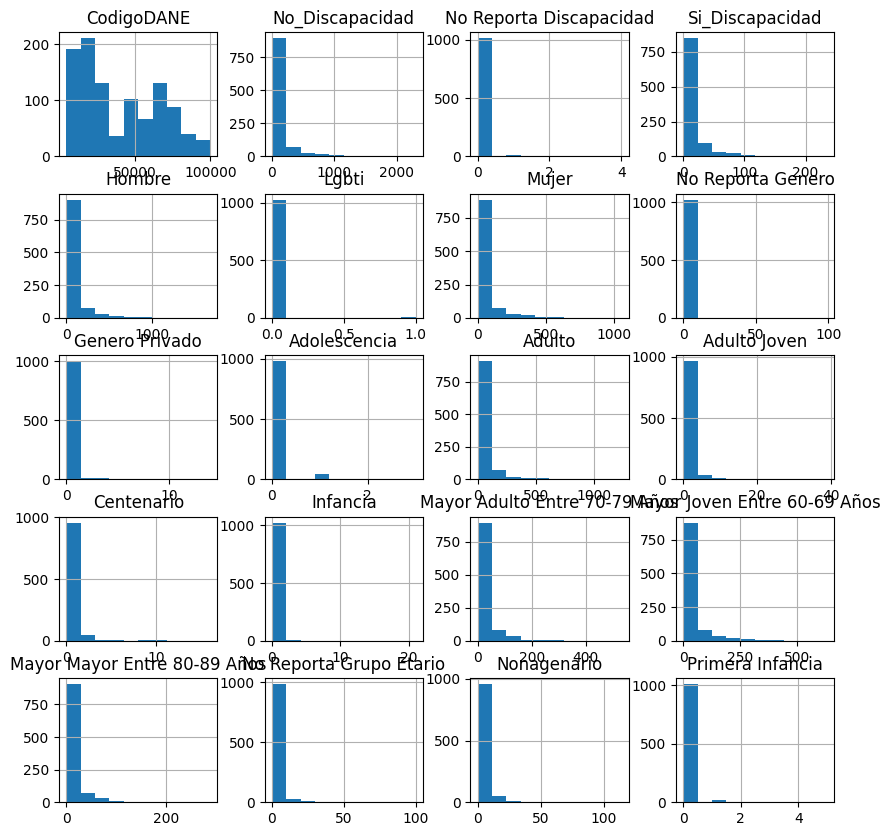

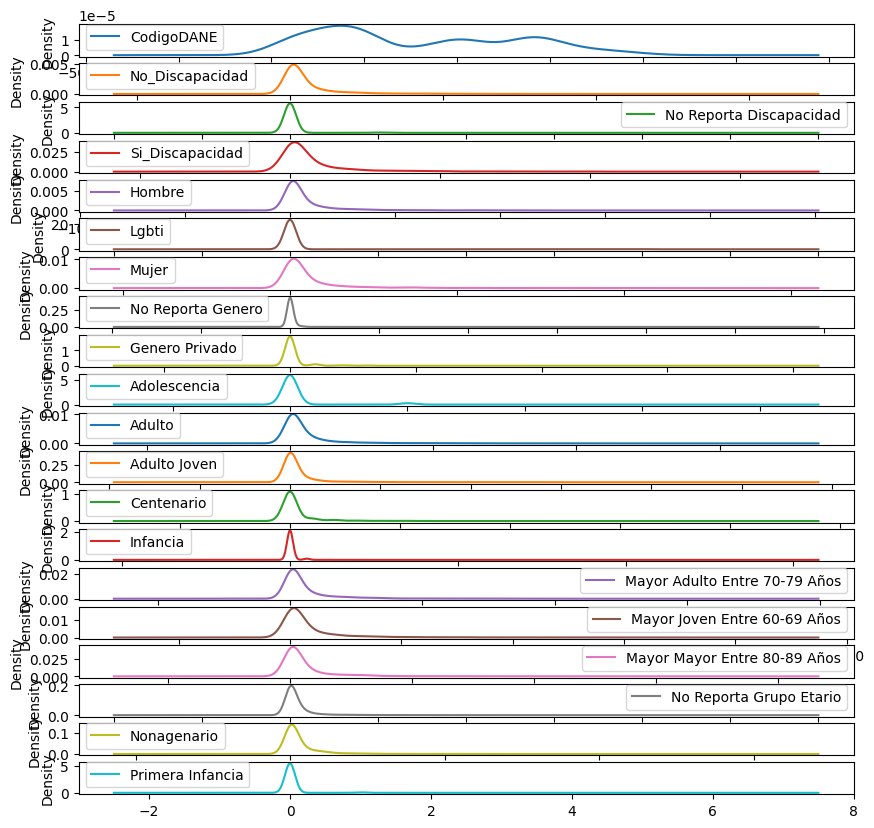

In [ ]:
df_final1.hist(figsize=(10, 10))
plt.show()

# Gráficos de densidad
df_final1.plot(kind='density', subplots=True, sharex=False, figsize=(10, 10))
plt.show()

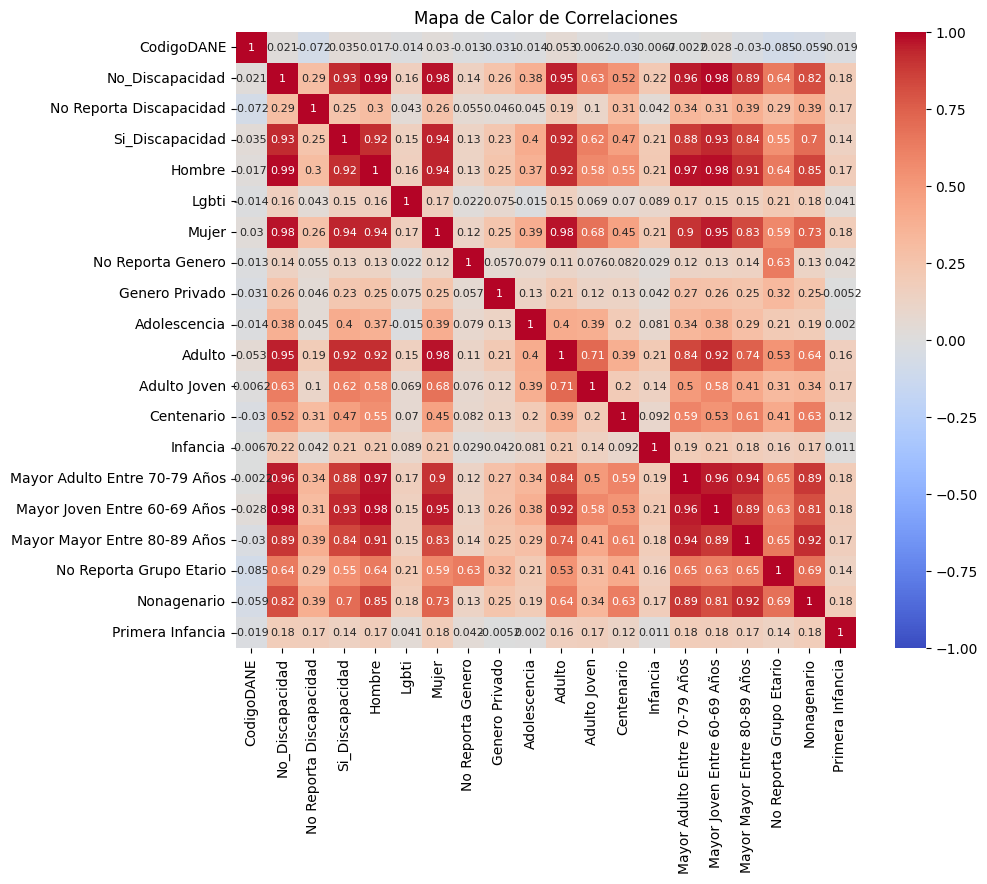

In [ ]:
numeric_df = df_final1.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8}) # Aquí se ajusta el tamaño de la fuente
plt.title('Mapa de Calor de Correlaciones')
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
df_final = df_final1.drop(columns=["DepartamentoDelPredio","MunicipioDelPredio","CodigoDANE"])

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_final)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

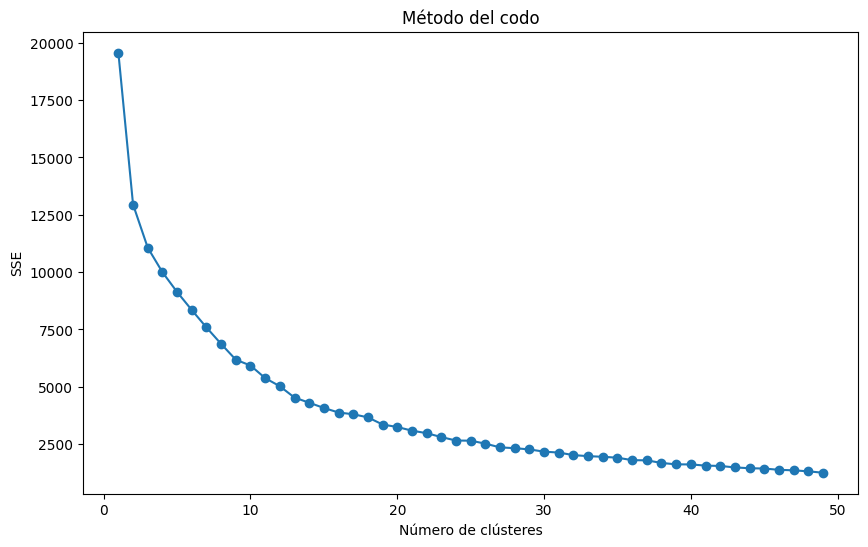

In [ ]:
# Usar el método del codo para encontrar el número óptimo de clústeres
sse = []
k_range = range(1, 50)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Número de clústeres')
plt.ylabel('SSE')
plt.title('Método del codo')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


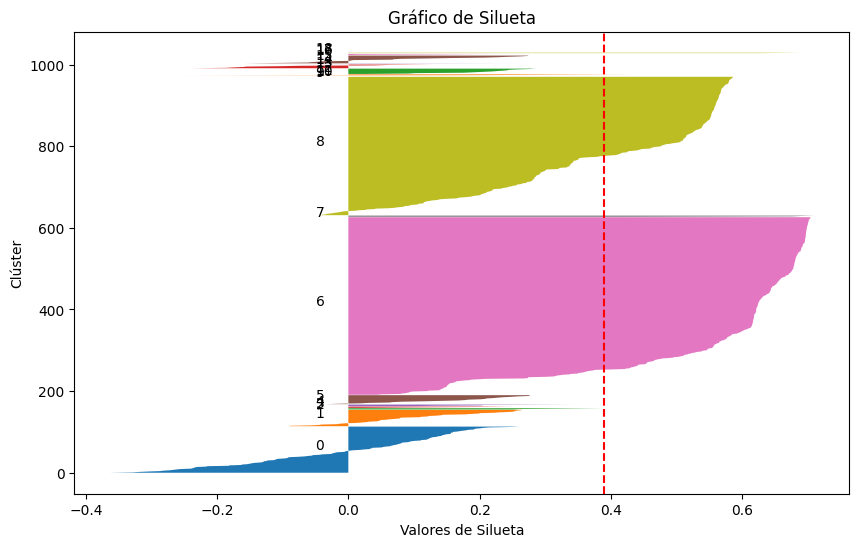

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numeric_df)

# Configurar el número óptimo de clústeres
optimal_k = 19

# Aplicar el algoritmo K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(df_scaled)

# Calcular los valores de silueta
silhouette_vals = silhouette_samples(df_scaled, labels)

# Crear un gráfico de silueta
plt.figure(figsize=(10, 6))
y_lower, y_upper = 0, 0
for i in range(optimal_k):
    ith_cluster_silhouette_values = silhouette_vals[labels == i]
    ith_cluster_silhouette_values.sort()
    y_upper += len(ith_cluster_silhouette_values)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values)
    plt.text(-0.05, (y_lower + y_upper) / 2, str(i))
    y_lower += len(ith_cluster_silhouette_values)

# Línea vertical para el puntaje promedio de silueta
avg_silhouette_score = silhouette_score(df_scaled, labels)
plt.axvline(x=avg_silhouette_score, color="red", linestyle="--")
plt.title('Gráfico de Silueta')
plt.xlabel('Valores de Silueta')
plt.ylabel('Clúster')
plt.show()

Text(0.5, 1.0, 'Método del Codo')

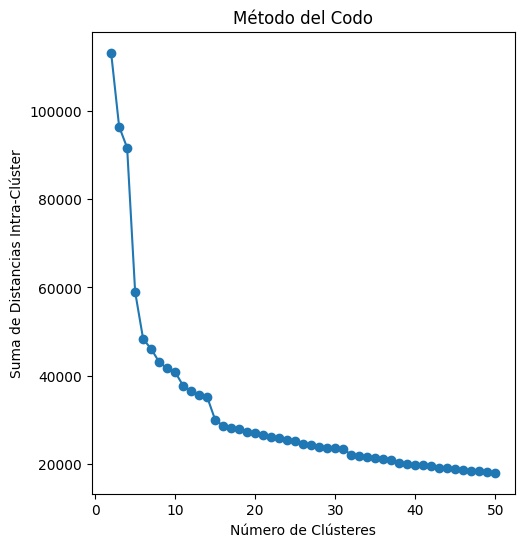

In [ ]:
from sklearn.cluster import AgglomerativeClustering

distances = []
silhouette_scores = []
for n_clusters in range(2, 51):  # Probar con 2 a 10 clústeres
    model = AgglomerativeClustering(n_clusters=n_clusters)
    labels = model.fit_predict(df_final)
    # Calcula la suma de distancias intra-clúster
    distances.append(np.sum([np.sum(np.linalg.norm(df_final[labels == i] - np.mean(df_final[labels == i], axis=0), axis=1)) for i in range(n_clusters)]))
    # Calcular el coeficiente de silueta
    if n_clusters > 1:  # Silhouette Score requiere al menos 2 clústeres
        silhouette_scores.append(silhouette_score(df_final, labels))

# Gráfico del método del codo
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 51), distances, marker='o')
plt.xlabel('Número de Clústeres')
plt.ylabel('Suma de Distancias Intra-Clúster')
plt.title('Método del Codo')

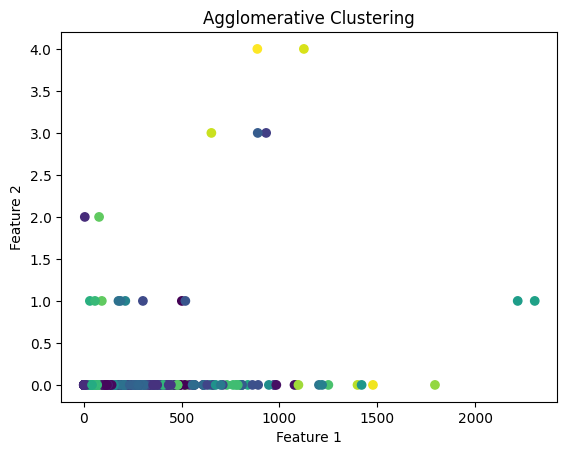

In [ ]:
# Aplicar el algoritmo de Clustering Aglomerativo
agg_clustering = AgglomerativeClustering(n_clusters=9)
labels_aglo = agg_clustering.fit_predict(df_final)

# Visualizar los clústeres
plt.scatter(df_final.iloc[:, 0], df_final.iloc[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Agglomerative Clustering')
plt.show()

Silhouette Score: 0.6220690187796117


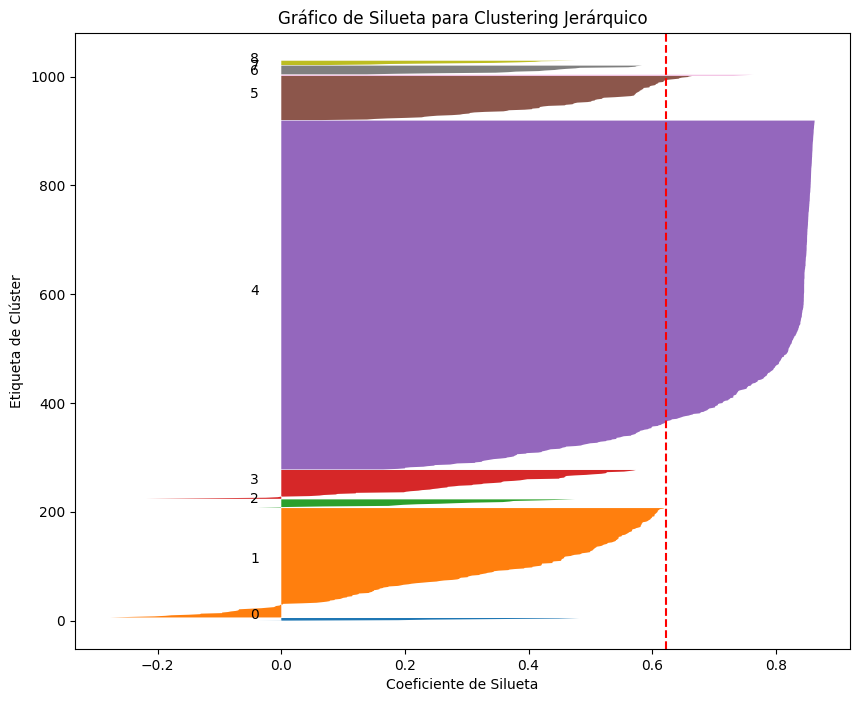

In [ ]:
from sklearn.cluster import AgglomerativeClustering
silhouette_vals = silhouette_samples(df_final, labels_aglo)
silhouette_avg = silhouette_score(df_final, labels_aglo)
print(f'Silhouette Score: {silhouette_avg}')

# Crear el gráfico de silueta
plt.figure(figsize=(10, 8))
y_lower, y_upper = 0, 0
for i in range(9):
    cluster_silhouette_vals = silhouette_vals[labels_aglo == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals)
    plt.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i))
    y_lower += len(cluster_silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.xlabel('Coeficiente de Silueta')
plt.ylabel('Etiqueta de Clúster')
plt.title('Gráfico de Silueta para Clustering Jerárquico')
plt.show()

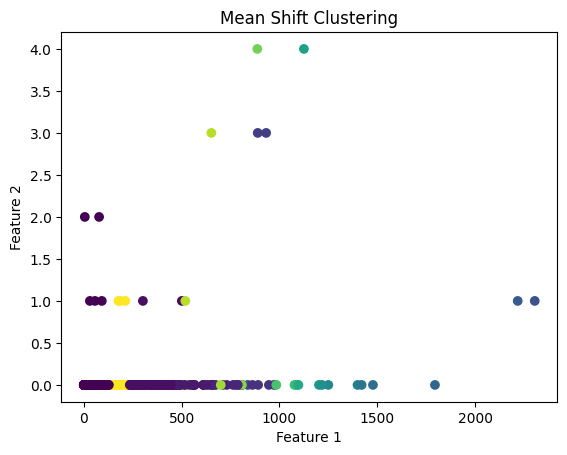

In [ ]:
from sklearn.cluster import MeanShift

# Aplicar el algoritmo Mean Shift
mean_shift = MeanShift()
labels = mean_shift.fit_predict(df_final)

# Visualizar los clústeres
plt.scatter(df_final.iloc[:, 0], df_final.iloc[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Mean Shift Clustering')
plt.show()


Silhouette Score: 0.6191308340265193


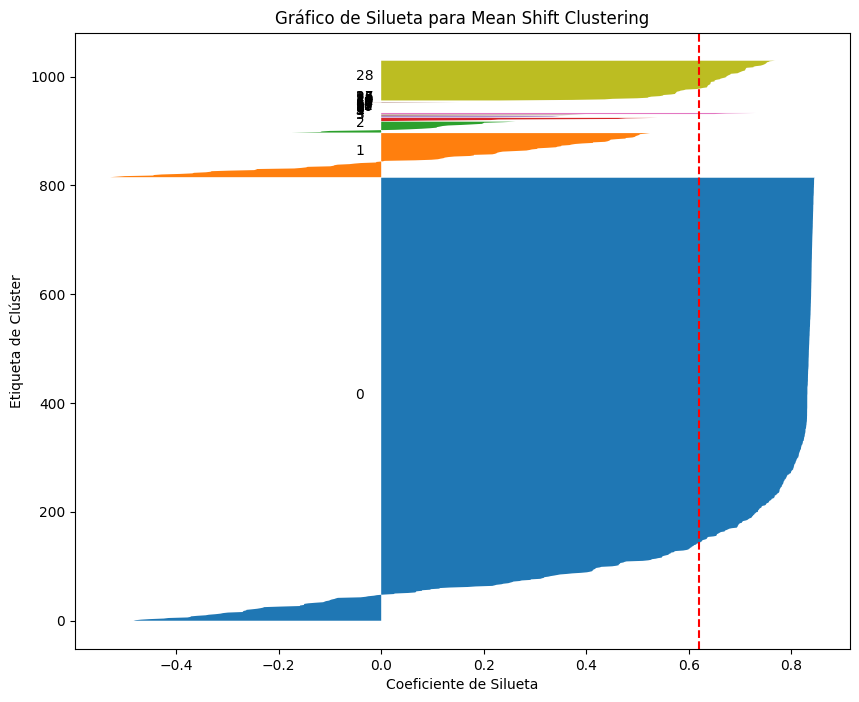

In [ ]:
silhouette_vals = silhouette_samples(df_final, labels)
silhouette_avg = silhouette_score(df_final, labels)
print(f'Silhouette Score: {silhouette_avg}')

# Crear el gráfico de silueta
plt.figure(figsize=(10, 8))
y_lower, y_upper = 0, 0
unique_labels = np.unique(labels)

for i in unique_labels:
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals)
    plt.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i))
    y_lower += len(cluster_silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.xlabel('Coeficiente de Silueta')
plt.ylabel('Etiqueta de Clúster')
plt.title('Gráfico de Silueta para Mean Shift Clustering')
plt.show()

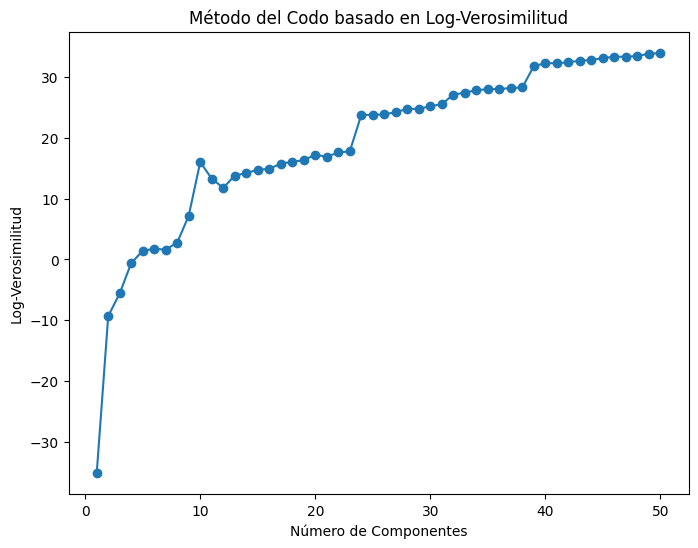

In [ ]:
from sklearn.mixture import GaussianMixture

# Log-verosimilitud
log_likelihoods = []
n_components_range = range(1, 51)

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(df_final)
    log_likelihoods.append(gmm.score(df_final))

# Gráfico del método del codo
plt.figure(figsize=(8, 6))
plt.plot(n_components_range, log_likelihoods, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Log-Verosimilitud')
plt.title('Método del Codo basado en Log-Verosimilitud')
plt.show()


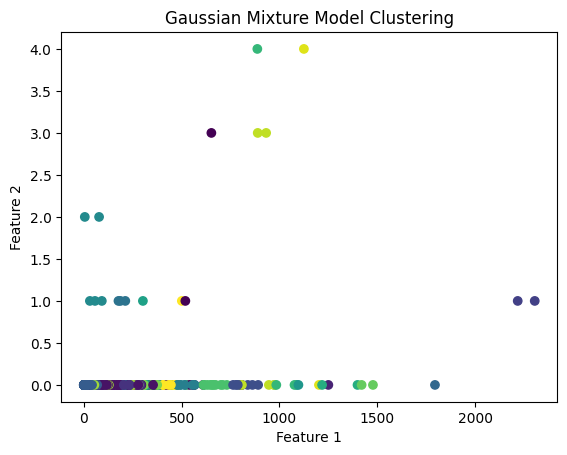

In [ ]:
# Aplicar el algoritmo GMM
gmm = GaussianMixture(n_components=22, random_state=42)
labels = gmm.fit_predict(df_final)

# Visualizar los clústeres
plt.scatter(df_final.iloc[:, 0], df_final.iloc[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Mixture Model Clustering')
plt.show()


Silhouette Score: 0.15062140151756845


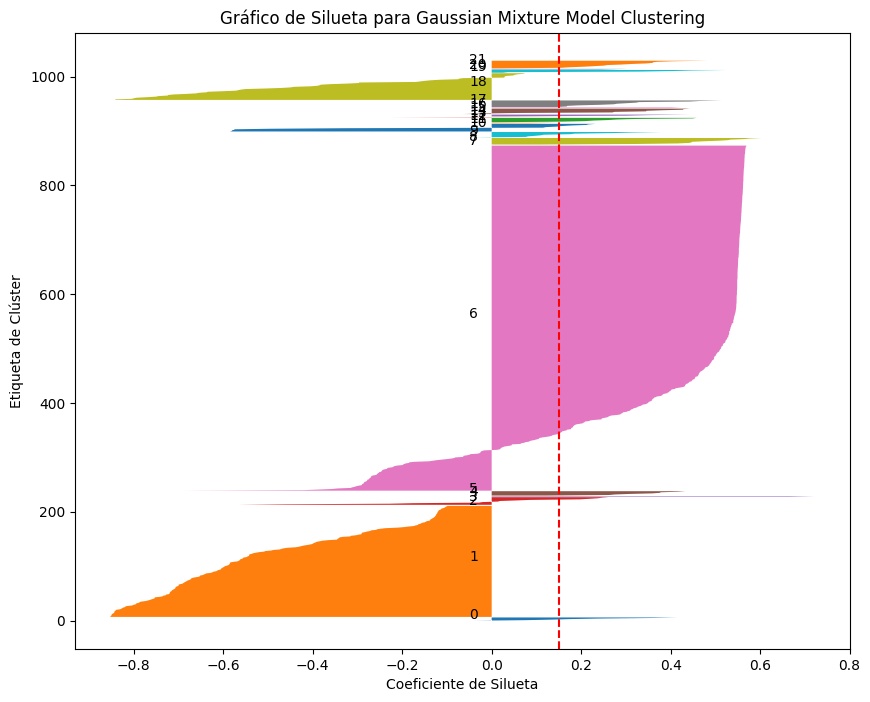

In [ ]:
silhouette_vals = silhouette_samples(df_final, labels)
silhouette_avg = silhouette_score(df_final, labels)
print(f'Silhouette Score: {silhouette_avg}')

# Crear el gráfico de silueta
plt.figure(figsize=(10, 8))
y_lower, y_upper = 0, 0
unique_labels = np.unique(labels)

for i in unique_labels:
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals)
    plt.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i))
    y_lower += len(cluster_silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.xlabel('Coeficiente de Silueta')
plt.ylabel('Etiqueta de Clúster')
plt.title('Gráfico de Silueta para Gaussian Mixture Model Clustering')
plt.show()

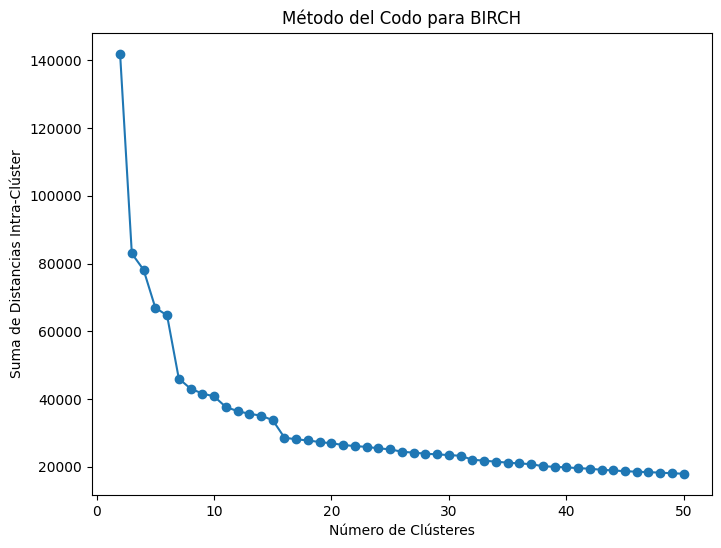

In [ ]:
from sklearn.cluster import Birch
from sklearn.decomposition import PCA

n_clusters_range = range(2, 51)  # Probar con 2 a 10 clústeres
inertia_values = []

for n_clusters in n_clusters_range:
    birch = Birch(n_clusters=n_clusters)
    labels_birch = birch.fit_predict(df_final)

    # Calcular la suma de distancias dentro de los clústeres
    distances = []
    for cluster in np.unique(labels_birch):
        cluster_points = df_final[labels_birch == cluster]
        centroid = cluster_points.mean(axis=0)
        distance = np.sum(np.sqrt(((cluster_points - centroid) ** 2).sum(axis=1)))
        distances.append(distance)

    inertia_values.append(np.sum(distances))

# Graficar el método del codo basado en la suma de distancias dentro de los clústeres
plt.figure(figsize=(8, 6))
plt.plot(n_clusters_range, inertia_values, marker='o')
plt.xlabel('Número de Clústeres')
plt.ylabel('Suma de Distancias Intra-Clúster')
plt.title('Método del Codo para BIRCH')
plt.show()

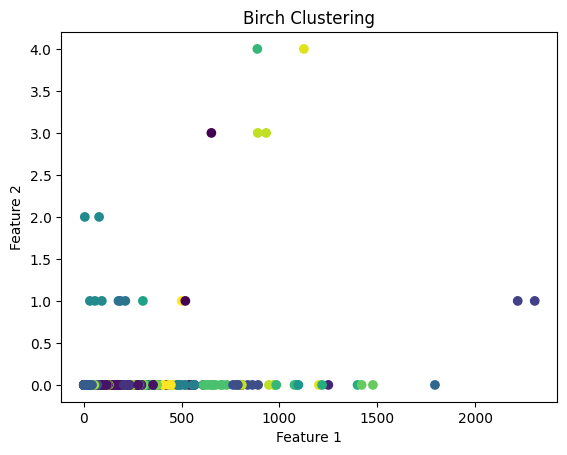

In [ ]:
# Aplicar el algoritmo Birch
birch = Birch(n_clusters=6)
labels_birch = birch.fit_predict(df_final)

# Visualizar los clústeres
plt.scatter(df_final.iloc[:, 0], df_final.iloc[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Birch Clustering')
plt.show()

Silhouette Score: 0.6834446396192755


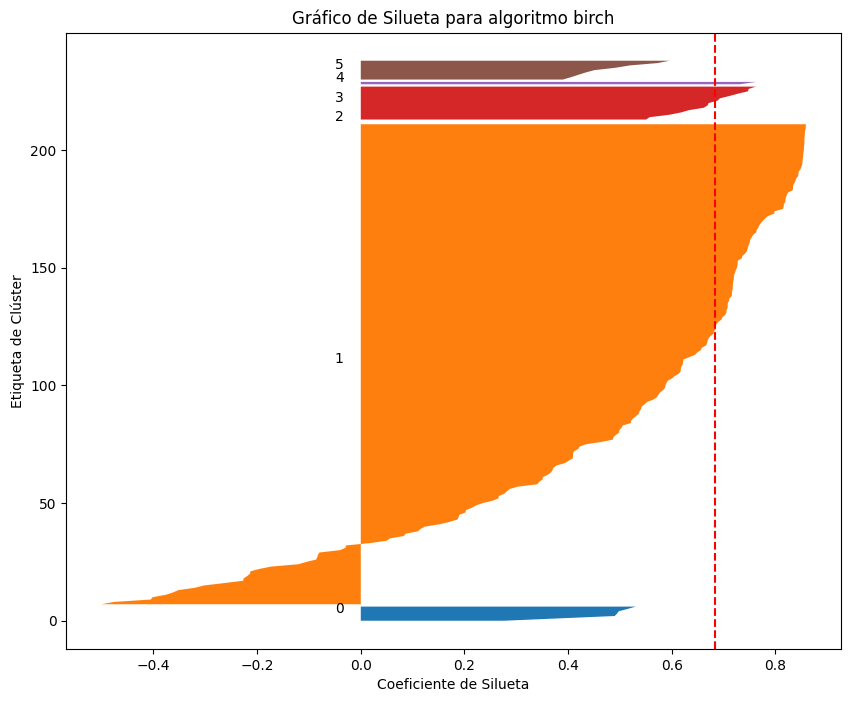

In [ ]:
silhouette_vals = silhouette_samples(df_final, labels_birch)
silhouette_avg = silhouette_score(df_final, labels_birch)
print(f'Silhouette Score: {silhouette_avg}')

# Crear el gráfico de silueta
plt.figure(figsize=(10, 8))
y_lower, y_upper = 0, 0
unique_labels = np.unique(labels_birch)

for i in unique_labels:
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals)
    plt.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i))
    y_lower += len(cluster_silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.xlabel('Coeficiente de Silueta')
plt.ylabel('Etiqueta de Clúster')
plt.title('Gráfico de Silueta para algoritmo birch')
plt.show()

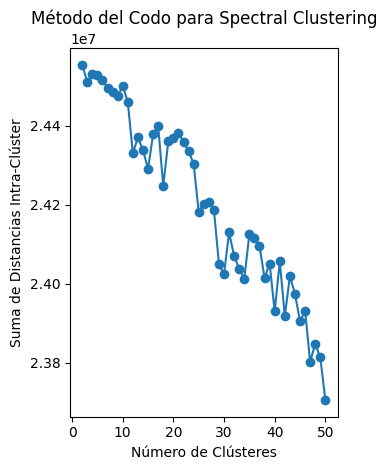

In [ ]:
from sklearn.cluster import SpectralClustering

n_clusters_range = range(2, 51)  # Probar con 2 a 10 clústeres
silhouette_scores = []
inertia_values = []

for n_clusters in n_clusters_range:
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
    labels = spectral.fit_predict(df_final)

    # Calcular el índice de silueta
    if n_clusters > 1:  # Silhouette Score requiere al menos 2 clústeres
        silhouette_scores.append(silhouette_score(df_final, labels))

    # Calcular la suma de distancias intra-clúster (para comparación)
    distances = []
    for cluster in np.unique(labels):
        cluster_points = numeric_df[labels == cluster]
        centroid = cluster_points.mean(axis=0)
        distance = np.sum(np.sqrt(((cluster_points - centroid) ** 2).sum(axis=1)))
        distances.append(distance)

    inertia_values.append(np.sum(distances))

# Graficar el método del codo basado en la suma de distancias dentro de los clústeres
plt.subplot(1, 2, 2)
plt.plot(n_clusters_range, inertia_values, marker='o')
plt.xlabel('Número de Clústeres')
plt.ylabel('Suma de Distancias Intra-Clúster')
plt.title('Método del Codo para Spectral Clustering')

plt.tight_layout()
plt.show()

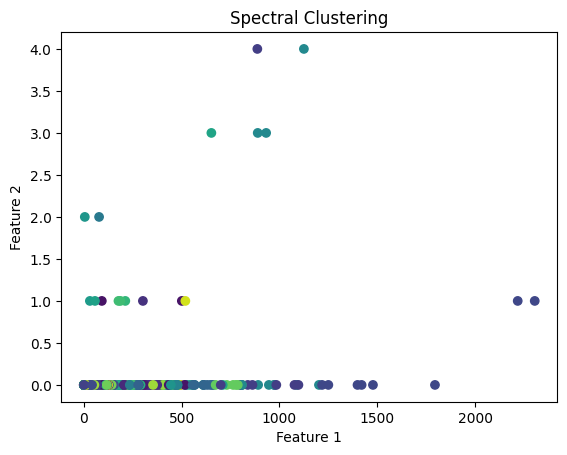

In [ ]:


# Aplicar el algoritmo Spectral Clustering
spectral = SpectralClustering(n_clusters=150, affinity='nearest_neighbors', random_state=42)
labels = spectral.fit_predict(df_final)

# Visualizar los clústeres
plt.scatter(df_final.iloc[:, 0], df_final.iloc[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Spectral Clustering')
plt.show()


Silhouette Score: 0.14575949182566247


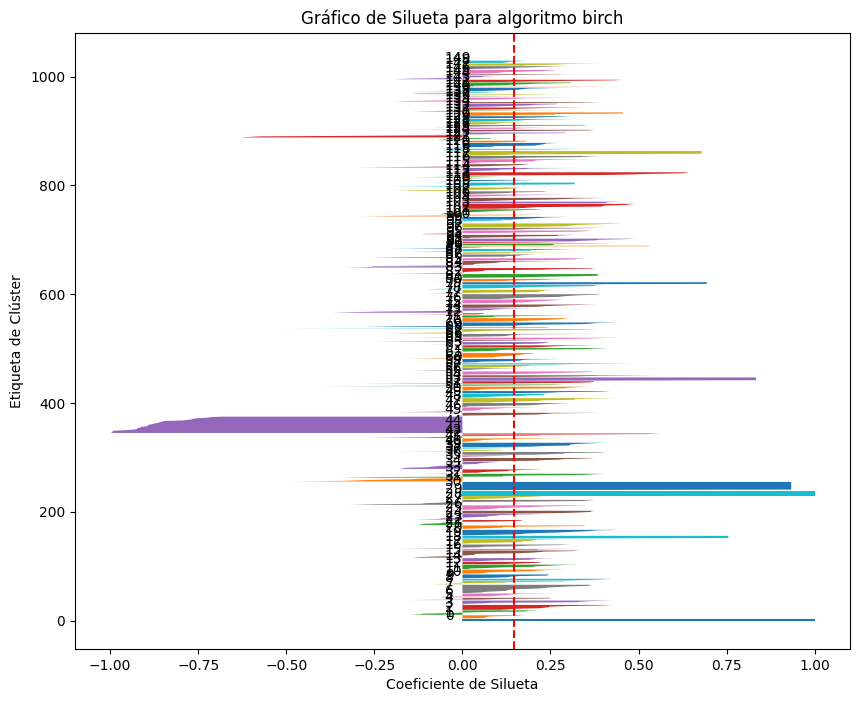

In [ ]:
silhouette_vals = silhouette_samples(df_final, labels)
silhouette_avg = silhouette_score(df_final, labels)
print(f'Silhouette Score: {silhouette_avg}')

# Crear el gráfico de silueta
plt.figure(figsize=(10, 8))
y_lower, y_upper = 0, 0
unique_labels = np.unique(labels)

for i in unique_labels:
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals)
    plt.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i))
    y_lower += len(cluster_silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.xlabel('Coeficiente de Silueta')
plt.ylabel('Etiqueta de Clúster')
plt.title('Gráfico de Silueta para algoritmo birch')
plt.show()

In [ ]:
df_final1['Cluster_Aglomerative'] = labels_aglo
df_final1["Cluster_Birch"] = labels_birch

In [ ]:
df_final1.head(100)

,DepartamentoDelPredio,MunicipioDelPredio,CodigoDANE,No_Discapacidad,No Reporta Discapacidad,Si_Discapacidad,Hombre,Lgbti,Mujer,No Reporta Genero,...,Centenario,Infancia,Mayor Adulto Entre 70-79 Años,Mayor Joven Entre 60-69 Años,Mayor Mayor Entre 80-89 Años,No Reporta Grupo Etario,Nonagenario,Primera Infancia,Cluster_Aglomerative,Cluster_Birch
0,Amazonas,El Encanto,91263,3,0,1,0,0,4,0,...,0,0,1,3,0,0,0,0,4,0
1,Amazonas,La Chorrera,91405,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,4,0
2,Amazonas,La Pedrera,91407,2,0,0,2,0,0,0,...,0,0,0,2,0,0,0,0,4,0
3,Amazonas,La Victoria,91430,5,0,0,4,0,1,0,...,0,0,0,3,0,0,0,0,4,0
4,Amazonas,Leticia,91001,9,0,0,1,0,8,0,...,0,0,3,2,0,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Antioquia,Sabanalarga,5628,26,0,9,18,0,17,0,...,0,1,4,10,5,0,1,0,4,0
96,Antioquia,Salgar,5642,76,0,22,56,0,42,0,...,1,0,23,18,13,1,0,0,1,0
97,Antioquia,San Andrés,5647,54,0,8,30,0,32,0,...,0,0,10,18,5,0,1,0,1,0
98,Antioquia,San Carlos,5649,1478,0,160,932,0,690,1,...,0,1,325,493,156,29,62,0,0,2


In [ ]:
df_final1.shape

(1030, 24)

In [ ]:
df_cluster_birch_0 = df_final1[df_final1['Cluster_Birch'] == 0]

In [ ]:
df_cluster_birch_0.head(200)

,DepartamentoDelPredio,MunicipioDelPredio,CodigoDANE,No_Discapacidad,No Reporta Discapacidad,Si_Discapacidad,Hombre,Lgbti,Mujer,No Reporta Genero,...,Centenario,Infancia,Mayor Adulto Entre 70-79 Años,Mayor Joven Entre 60-69 Años,Mayor Mayor Entre 80-89 Años,No Reporta Grupo Etario,Nonagenario,Primera Infancia,Cluster_Aglomerative,Cluster_Birch
0,Amazonas,El Encanto,91263,3,0,1,0,0,4,0,...,0,0,1,3,0,0,0,0,4,0
1,Amazonas,La Chorrera,91405,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,4,0
2,Amazonas,La Pedrera,91407,2,0,0,2,0,0,0,...,0,0,0,2,0,0,0,0,4,0
3,Amazonas,La Victoria,91430,5,0,0,4,0,1,0,...,0,0,0,3,0,0,0,0,4,0
4,Amazonas,Leticia,91001,9,0,0,1,0,8,0,...,0,0,3,2,0,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Boyacá,Guayatá,15325,3,0,1,0,0,4,0,...,0,0,1,2,0,0,0,0,4,0
234,Boyacá,Guouicán,15332,11,0,3,13,0,1,0,...,0,0,0,1,9,0,2,0,4,0
235,Boyacá,Jenesano,15367,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0
236,Boyacá,Jericó,15368,3,0,1,3,0,1,0,...,0,0,1,2,0,0,0,0,4,0


In [ ]:
df_final1.to_csv('df_final1.csv', index=False)

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Aplicar PCA después del clustering
pca = PCA(n_components=2)  # Reducimos a 2 dimensiones para visualización
df_pca = pca.fit_transform(df_final)

# Crear un DataFrame para visualizar las componentes principales y su varianza explicada
df_pca_components = pd.DataFrame(pca.components_, columns=df_final.columns)
df_pca_components.index = ['PC1', 'PC2']

# Mostrar la importancia de las variables en los primeros dos componentes
print("Importancia de las variables en las componentes principales:")
print(df_pca_components)

# Visualizar la varianza explicada
explained_variance = pca.explained_variance_ratio_
print(f'Varianza explicada por la PC1: {explained_variance[0]:.2f}')
print(f'Varianza explicada por la PC2: {explained_variance[1]:.2f}')

Importancia de las variables en las componentes principales:
     No_Discapacidad  No Reporta Discapacidad  Si_Discapacidad    Hombre  \
PC1         0.706982                 0.000243         0.084254  0.454969   
PC2        -0.106962                -0.001495         0.055352 -0.452520   

        Lgbti     Mujer  No Reporta Genero  Genero Privado  Adolescencia  \
PC1  0.000035  0.329780           0.001421        0.000617      0.000313   
PC2 -0.000010  0.406068          -0.003500       -0.001205      0.000589   

       Adulto  Adulto Joven  Centenario  Infancia  \
PC1  0.332746      0.005804    0.002032  0.000486   
PC2  0.682599      0.025187   -0.010859  0.000208   

     Mayor Adulto Entre 70-79 Años  Mayor Joven Entre 60-69 Años  \
PC1                       0.138646                      0.202727   
PC2                      -0.272090                     -0.138262   

     Mayor Mayor Entre 80-89 Años  No Reporta Grupo Etario  Nonagenario  \
PC1                      0.075129        